In [94]:
# -*- coding: utf-8 -*-

In [95]:
from __future__ import unicode_literals
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op

In [2]:
data=pd.read_excel("SpeedVideoDataforModeling.xlsx")

In [65]:
def complex_rate(p, RTT, MSS=1460, wmax=100):
    def Rate(MSS, RTT, p, w, Q, G, T0, wmax):
        if True:#w(p) < wmax:
            Rate = MSS * ( ((1-p)/p) + w(p) + (Q(p, w(p))/(1-p)))/\
            (RTT * (w(p) + 1) + ((Q(p, w(p)) * G(p) * T0) /(1-p)))
        else:
            Rate = MSS * ( (1-p)/p + wmax + Q(p, wmax) / (1-p))/\
            (RTT*(0.25*wmax + (1 - p)/(p *wmax) + 2)+\
             (Q(p, wmax)*G(p)*T0) / (1 - p))
        return Rate


    def w(p):
        return (2 / 3) * (1 + np.sqrt(3*((1 - p)/p)+1))


    def Q(p, w):
        return np.min([1, ((1-(1-p)**3)) * (1+np.power(1-p,3)*(1-np.power(1-p,w-3)))/
                       (1 - np.power(1-p,w))])

    def G(p):
        return np.sum([np.power(2, i - 1) * np.power(p, i) for i in np.linspace(1,6,6)])+1
    
    return Rate(MSS, RTT,p, w, Q, G, 2*RTT, wmax)

def simple_rate(p, RTT, MSS=1460):
    return MSS/(RTT*np.sqrt(2*p/3))

In [73]:
def simple_rate2(p, RTT, MSS=1460):
    return MSS/(RTT*(p+np.sqrt(p**2+24*p)))

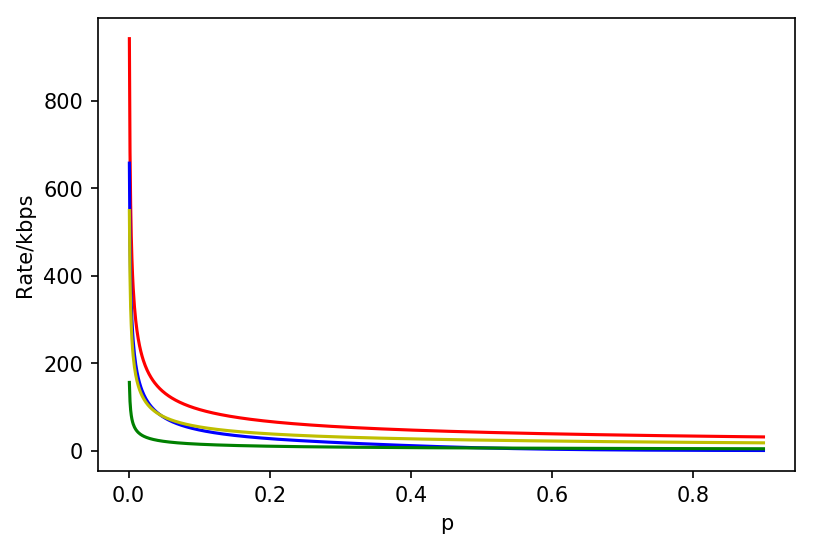

In [87]:
x=np.linspace(0.001,0.9,1000)
y1=np.array([simple_rate(i,60) for i in x])
y2=np.array([complex_rate(i,60) for i in x])
y3=np.array([simple_rate2(i,60) for i in x])
y4=(y1+y3)/2
g=plt.figure()
plt.plot(x,y1,'r')
plt.plot(x,y2,'b')
plt.plot(x,y3,'g')
plt.plot(x,y4,'y')
plt.xlabel('p')
plt.ylabel('Rate/kbps')
g.dpi=150
plt.show()

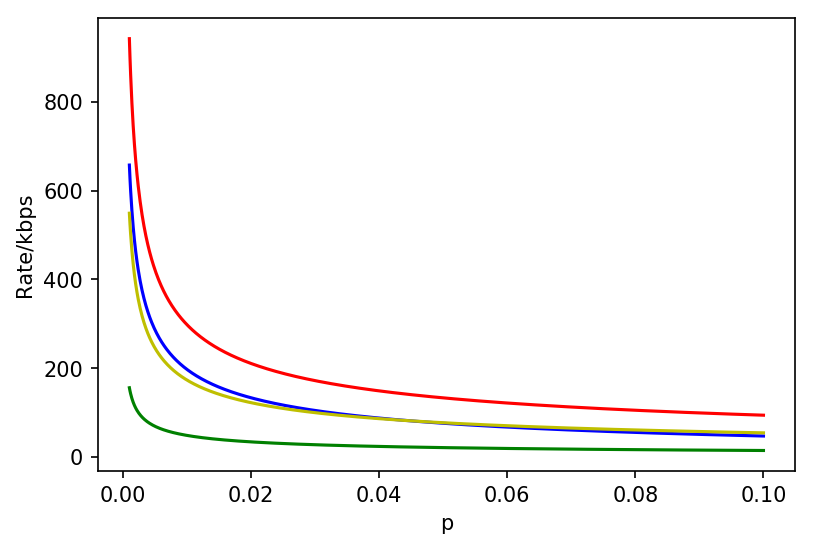

In [89]:
x=np.linspace(0.001,0.1,1000)
y1=np.array([simple_rate(i,60) for i in x])
y2=np.array([complex_rate(i,60) for i in x])
y3=np.array([simple_rate2(i,60) for i in x])
y4=(y1+y3)/2
g=plt.figure()
plt.plot(x,y1,'r')
plt.plot(x,y2,'b')
plt.plot(x,y3,'g')
plt.plot(x,y4,'y')
plt.xlabel('p')
plt.ylabel('Rate/kbps')
g.dpi=150
plt.show()

In [56]:
data.columns

Index(['ID', '初始缓冲峰值速率(kbps)', 'E2E RTT(ms)', '播放阶段平均速率(kbps)', '初始缓冲时延(ms)',
       '卡顿占比', 'VMOS', '视频全程感知速率(kbps)', '卡顿时长(ms)', '播放时长(ms)', '播放阶段总时长(ms)',
       '卡顿次数', '视频码率(kbps)', '初始缓冲下载数据量(byte)', '视频质量得分SQuality',
       '初始缓冲得分SLoading', '卡顿得分Sstalling'],
      dtype='object')

In [90]:
RTT=data['E2E RTT(ms)']
average_v=data['播放阶段平均速率(kbps)']

MSS=1460*8
# model simple
p1=np.power(MSS/(RTT*average_v),2)
#model simple 2
p2=MSS**2/(2*RTT*average_v*(MSS+12*RTT*average_v))

p=(p1+p2)/2

In [93]:
p.head()

0    0.001761
1    0.000754
2    0.000954
3    0.000657
4    0.000693
dtype: float64

C:\Users\84338\Anaconda3\lib\site-packages\ipykernel\__main__.py:24: RuntimeWarning: invalid value encountered in sqrt
C:\Users\84338\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


array([ 0.2])